In [70]:
cd C:\Users\venka\OneDrive\Desktop\BTP\Data\source_doublet_vortex\train_data\train

C:\Users\venka\OneDrive\Desktop\BTP\Data\source_doublet_vortex\train_data\train


Import the libraries

In [3]:
import matplotlib.pyplot as plt
import scipy.io
import time
from keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D,Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import os
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import tensorflow as tf

# Source sink

Import the Data

In [99]:
cd C:\Users\venka\OneDrive\Desktop\BTP\Data\source_doublet_vortex\train_data\train

C:\Users\venka\OneDrive\Desktop\BTP\Data\source_doublet_vortex\train_data\train


In [100]:
X_train = np.load('source_sink_train.npy')
y_train = np.load('source_sink_sth_train.npy')

In [72]:
X_train.shape

(1626, 26, 26, 3)

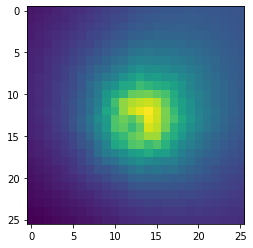

In [73]:
plt.imshow(X_train[0][:,:,2])

In [74]:
y_train.shape

(1626,)

In [101]:
cd C:\Users\venka\OneDrive\Desktop\BTP\Data\source_doublet_vortex\train_data\val

C:\Users\venka\OneDrive\Desktop\BTP\Data\source_doublet_vortex\train_data\val


In [102]:
X_val = np.load('source_sink_val.npy')
y_val = np.load('source_sink_sth_val.npy')

In [77]:
X_val.shape

(334, 26, 26, 3)

In [78]:
y_val.shape

(334,)

In [103]:
X_train = (X_train/500 + 1)/2
X_val = (X_val/500 + 1)/2

In [104]:
y_train = (y_train/500 + 1)/2
y_val = (y_val/500 + 1)/2

# Model

In [106]:
model = Sequential()

model.add(Conv2D(512, (5), activation='relu',input_shape=(26,26,3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (4), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dropout(0.5))  #Dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='adam')

In [107]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 22, 22, 512)       38912     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 11, 11, 512)       0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 8, 8, 256)         2097408   
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 2, 2, 128)         295040    
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 128)             

In [108]:
model.fit(X_train, y_train, 
          validation_data=(X_val,y_val),
          batch_size=64, 
          epochs=120, 
          shuffle = True)

Epoch 1/120
26/26 [==============================] - 17s 604ms/step - loss: 0.0724 - val_loss: 0.0269
Epoch 2/120
26/26 [==============================] - 17s 638ms/step - loss: 0.0133 - val_loss: 0.0429
Epoch 3/120
26/26 [==============================] - 19s 743ms/step - loss: 0.0080 - val_loss: 0.0298
Epoch 4/120
26/26 [==============================] - 18s 671ms/step - loss: 0.0070 - val_loss: 0.0274
Epoch 5/120
26/26 [==============================] - 20s 760ms/step - loss: 0.0043 - val_loss: 0.0291
Epoch 6/120
26/26 [==============================] - 17s 653ms/step - loss: 0.0021 - val_loss: 0.0230
Epoch 7/120
26/26 [==============================] - 20s 785ms/step - loss: 0.0012 - val_loss: 0.0256
Epoch 8/120
26/26 [==============================] - 18s 688ms/step - loss: 8.6405e-04 - val_loss: 0.0244
Epoch 9/120
26/26 [==============================] - 19s 736ms/step - loss: 6.8409e-04 - val_loss: 0.0214
Epoch 10/120
26/26 [==============================] - 18s 711ms/step - los

KeyboardInterrupt: 

In [109]:
predicted=model.predict(X_val)

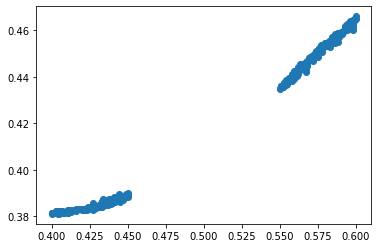

In [110]:
plt.scatter(y_val,predicted)

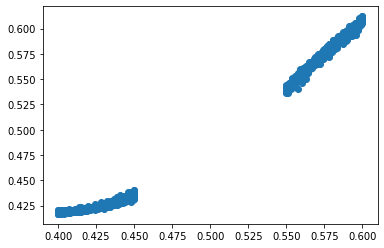

In [120]:
plt.scatter(y_train,(model.predict(X_train)-b[0])/m[0])

In [112]:
y_train

array([0.564, 0.428, 0.416, ..., 0.431, 0.412, 0.563])

In [122]:
(model.predict(X_train)-b[0])/m[0]

array([[0.56363297],
       [0.42551824],
       [0.4206138 ],
       ...,
       [0.4257208 ],
       [0.41911975],
       [0.5623392 ]], dtype=float32)

In [115]:
m,b = np.polyfit(y_train,model.predict(X_train),1)

In [123]:
m,b

(array([0.43784698]), array([0.19821577]))

In [124]:
model.save('source_sink_weights.h5')

# Doublet

In [125]:
cd C:\Users\venka\OneDrive\Desktop\BTP\Data\source_doublet_vortex\train_data\train

C:\Users\venka\OneDrive\Desktop\BTP\Data\source_doublet_vortex\train_data\train


In [126]:
X_train = np.load('doublet_train.npy')
y_train = np.load('doublet_sth_train.npy')

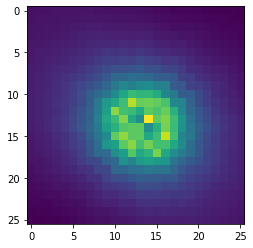

In [127]:
plt.imshow(X_train[0][:,:,2])

In [128]:
cd C:\Users\venka\OneDrive\Desktop\BTP\Data\source_doublet_vortex\train_data\val

C:\Users\venka\OneDrive\Desktop\BTP\Data\source_doublet_vortex\train_data\val


In [129]:
X_val = np.load('doublet_val.npy')
y_val = np.load('doublet_sth_val.npy')

In [130]:
X_train = (X_train/500 + 1)/2
X_val = (X_val/500 + 1)/2

In [131]:
y_train = (y_train/500 + 1)/2
y_val = (y_val/500 + 1)/2

In [132]:
model = Sequential()

model.add(Conv2D(512, (5), activation='relu',input_shape=(26,26,3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (4), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dropout(0.5))  #Dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='adam')

In [133]:
model.fit(X_train, y_train, 
          validation_data=(X_val,y_val),
          batch_size=64, 
          epochs=120, 
          shuffle = True)

Epoch 1/120
27/27 [==============================] - 22s 590ms/step - loss: 0.1696 - val_loss: 0.0485
Epoch 2/120
27/27 [==============================] - 17s 642ms/step - loss: 0.0109 - val_loss: 0.0337
Epoch 3/120
27/27 [==============================] - 17s 643ms/step - loss: 0.0044 - val_loss: 0.0537
Epoch 4/120
27/27 [==============================] - 17s 638ms/step - loss: 0.0028 - val_loss: 0.0443
Epoch 5/120
27/27 [==============================] - 18s 650ms/step - loss: 0.0027 - val_loss: 0.0464
Epoch 6/120
27/27 [==============================] - 17s 646ms/step - loss: 0.0015 - val_loss: 0.0488
Epoch 7/120
27/27 [==============================] - 17s 642ms/step - loss: 0.0012 - val_loss: 0.0417
Epoch 8/120
27/27 [==============================] - 17s 640ms/step - loss: 9.2615e-04 - val_loss: 0.0401
Epoch 9/120
27/27 [==============================] - 17s 646ms/step - loss: 7.9936e-04 - val_loss: 0.0415
Epoch 10/120
27/27 [==============================] - 18s 688ms/step - los

In [134]:
m,b = np.polyfit(y_train,model.predict(X_train),1)

In [138]:
m,b

(array([0.35163331]), array([0.24319486]))

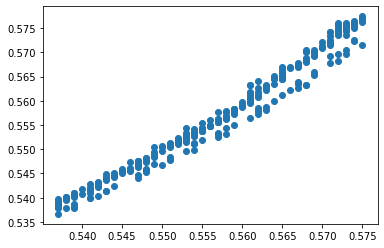

In [137]:
plt.scatter(y_val,(model.predict(X_val)-b[0])/m[0])

In [141]:
model.save('doublet_weights.h5')

# Vortex

In [142]:
cd C:\Users\venka\OneDrive\Desktop\BTP\Data\source_doublet_vortex\train_data\train

C:\Users\venka\OneDrive\Desktop\BTP\Data\source_doublet_vortex\train_data\train


In [143]:
X_train = np.load('vortex_train.npy')
y_train = np.load('vortex_sth_train.npy')

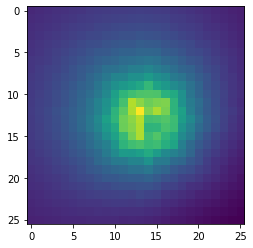

In [144]:
plt.imshow(X_train[0][:,:,2])

In [145]:
cd C:\Users\venka\OneDrive\Desktop\BTP\Data\source_doublet_vortex\train_data\val

C:\Users\venka\OneDrive\Desktop\BTP\Data\source_doublet_vortex\train_data\val


In [147]:
X_val = np.load('vortex_val.npy')
y_val = np.load('vortex_sth_val.npy')

In [148]:
X_train = (X_train/500 + 1)/2
X_val = (X_val/500 + 1)/2

In [149]:
y_train = (y_train/500 + 1)/2
y_val = (y_val/500 + 1)/2

In [150]:
model = Sequential()

model.add(Conv2D(512, (5), activation='relu',input_shape=(26,26,3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (4), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dropout(0.5))  #Dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='adam')

In [151]:
model.fit(X_train, y_train, 
          validation_data=(X_val,y_val),
          batch_size=64, 
          epochs=120, 
          shuffle = True)

Epoch 1/120
26/26 [==============================] - 18s 599ms/step - loss: 0.1036 - val_loss: 0.0021
Epoch 2/120
26/26 [==============================] - 17s 635ms/step - loss: 0.0084 - val_loss: 0.0297
Epoch 3/120
26/26 [==============================] - 17s 649ms/step - loss: 0.0042 - val_loss: 0.0454
Epoch 4/120
26/26 [==============================] - 17s 639ms/step - loss: 0.0026 - val_loss: 0.0426
Epoch 5/120
26/26 [==============================] - 17s 645ms/step - loss: 0.0020 - val_loss: 0.0477
Epoch 6/120
26/26 [==============================] - 17s 657ms/step - loss: 0.0013 - val_loss: 0.0456
Epoch 7/120
26/26 [==============================] - 17s 645ms/step - loss: 0.0010 - val_loss: 0.0455
Epoch 8/120
26/26 [==============================] - 18s 690ms/step - loss: 7.8197e-04 - val_loss: 0.0476
Epoch 9/120
26/26 [==============================] - 17s 665ms/step - loss: 7.0785e-04 - val_loss: 0.0463
Epoch 10/120
26/26 [==============================] - 17s 647ms/step - los

In [152]:
m,b = np.polyfit(y_train,model.predict(X_train),1)

In [153]:
m,b

(array([0.28876907]), array([0.26025826]))

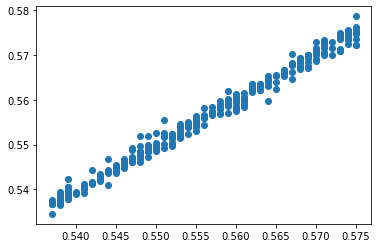

In [154]:
plt.scatter(y_val,(model.predict(X_val)-b[0])/m[0])

In [155]:
model.save('vortex_weights.h5')